Содержание
Этот набор данных содержит информацию о бронировании городского отеля и курортного отеля, а также включает в себя такую информацию, как время бронирования, продолжительность пребывания, количество взрослых, детей и/или младенцев, а также количество доступных парковочных мест и многое другое.

Вся личная идентифицирующая информация была удалена из этих данных.

Данные были загружены и очищены Томасом МОКом и Антуаном Биша для #TidyTuesday в течение недели 11 февраля 2020 года.

В рамках данного ноутбука попробуем провести исследовательский анализ данных (EDA) и построить прогностическую модель по отмене бронирования номеров в гостиницах, что позволит в теории лучше управлять гостиницам своей наполняемостью, планировать деятельность исходя из заявок.

источник данных: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [22]:
import numpy as np
import pandas as pd
df=pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [23]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

'hotel' - отель
'is_canceled' - отменяется ли 
'lead _ time' - время выполнения заказа
'arrival _ date _ year' - прибытие  дата год
'arrival _ date _ month' - прибытие  дата месяц 
'arrival _ date _ week _ number' - прибытие  дата неделя номер
'arrival_date_day_of_month' - дата прибытия день месяца
'stays _  in _ weekend _ nights' - пребывание в выходные ночи
'stays_in_week_nights' - остается _ в _ неделю _ ночей"
'adults' -	взрослые
'children' - дети
'babies' -младенцы
'meal' -	еда
'adr' (Average Daily Rate) - Средняя Суточная Норма
'country' - 	"страна",
'market_segment' - сегмент рынка_
'distribution _ channel' -	канал распределения _
'is _ repeated _ guest' -	- это _ повторяется _ гость
'previous _  cancellations' -	предыдущие _ отмены
'previous _ bookings _ not _ canceled' -	предыдущие _ бронирования _ не _ отменены
'reserved _ room _ type' -	зарезервировано номер _ _ тип
'assigned _ room_type' -	присвоен _ тип номера _
'booking_changes' -	букинг _ изменения
'deposit _ type' -	депозит _ тип
'agent' -	агент
'company' - 	компания
'days _ in _ waiting _ list' - 	дни _ в _ списке ожидания _
'customer _ type' -	заказчика _ тип
'required _ car _ parking_spaces',	'требуется _ автомобиль _ парковка _ пространств


In [24]:
df.shape

(119390, 32)

Данных много, как строк так и столбцов, при машинном обучении мы не будем использовать все данные. Перед нами стоит задача, изучить данные, выявить полезную статистику и распределение по  отелям, месяцам, годам. Далее отберем признаки для машинного обучения

In [25]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [26]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [27]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [28]:
df.groupby('hotel')[['is_canceled','children','babies']].mean()

,is_canceled,children,babies
hotel,,,
City Hotel,0.417270,0.091370,0.004941
Resort Hotel,0.277634,0.128682,0.013904


Как мы видим отменяют чаще бронирование в городских отелях, с детьми чаще ездят в курортные районы мы видим, это из сгруппированном таблички данных по средним значениям

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

Не смотря на то, что отмена брони чаще в городских отелях, бронирование почти в два раза больше номеров в городских гостиницах по сравнению с курортными отелями.

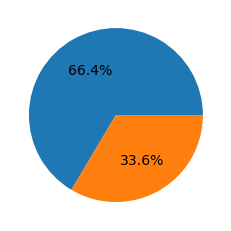

In [31]:
plt.pie(df['hotel'].value_counts(),autopct='%1.1f%%',textprops={'fontsize': 14})
plt.show()

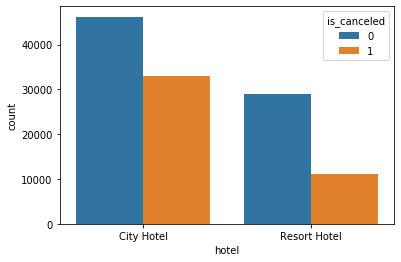

In [32]:
sns.barplot(x="hotel", y="lead_time", hue="is_canceled", data=df.groupby(["hotel","is_canceled"]).lead_time.count().reset_index())
plt.ylabel('count')
plt.show()

Визуально представляем информацию о которой говорили выше. Дальше визуализируем ряд ещё данных.

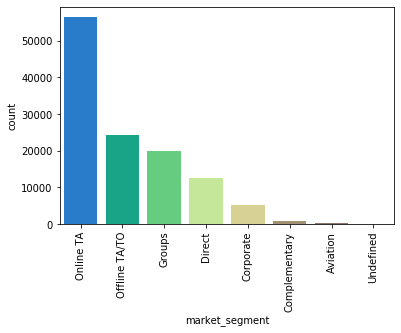

In [33]:
sns.countplot(x="market_segment", data = df,palette = 'terrain',order = df['market_segment'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

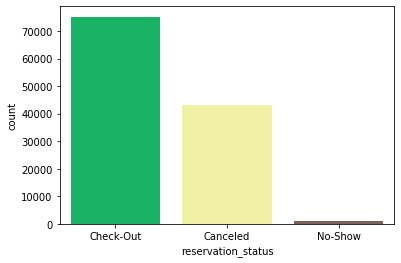

In [34]:
sns.countplot(x="reservation_status", data = df, palette="terrain")
plt.show()

In [35]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [36]:
df.groupby('country').agg({'is_canceled':'sum'}).sort_values('is_canceled', ascending = False).head(10)

,is_canceled
country,
PRT,27519
GBR,2453
ESP,2177
FRA,1934
ITA,1333
DEU,1218
IRL,832
BRA,830
USA,501


В данном случае видим агрегацию данных по отмене бронирования в разрезе стран

In [37]:
df.groupby('hotel').agg({'stays_in_week_nights':'mean'})

,stays_in_week_nights
hotel,
City Hotel,2.182957
Resort Hotel,3.128732


In [38]:
df.groupby('hotel').agg({'stays_in_weekend_nights':'mean'})

,stays_in_weekend_nights
hotel,
City Hotel,0.795185
Resort Hotel,1.189815


В данном случае мы посмотрели среднее число дней(ночей), на которые снимают номер в отеле. В целом в курортным отелях проводям времени больше, чем в городских отелях

In [39]:
df.groupby('arrival_date_month').agg({'arrival_date_year':'count'}).sort_values('arrival_date_year', ascending = False)

,arrival_date_year
arrival_date_month,
August,13877
July,12661
May,11791
October,11160
April,11089
June,10939
September,10508
March,9794
February,8068


Распределение по месяц, благодаря сортировке видим наиболее востребованные месяцы.

In [40]:
df.query("is_canceled == '1' and hotel == 'City Hotel'").groupby('arrival_date_year').arrival_date_month.value_counts()

arrival_date_year  arrival_date_month
2015               September             1543
                   October               1321
                   August                1232
                   July                   939
                   December               668
                   November               301
2016               October               1947
                   June                  1720
                   September             1567
                   April                 1539
                   May                   1436
                   November              1360
                   August                1247
                   March                 1108
                   December              1072
                   July                  1043
                   February               930
                   January                438
2017               May                   2217
                   April                 1926
                   June                  1

Посмотрим значения в разрезе годов и месяцев по городским отелям

In [41]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

Попробуем при помощи машинного обучения предсказать отмену бронировнаия номера в отеле. Вернем к характеристикам данных и уберем столбцы, которые в данном примере (ноутбуке) не будут использоваться.

In [42]:
df.reserved_room_type

0         C
1         C
2         A
3         A
4         A
         ..
119385    A
119386    E
119387    D
119388    A
119389    A
Name: reserved_room_type, Length: 119390, dtype: object

In [43]:
df_2= df.drop(['assigned_room_type', 'agent','company','adr'], axis=1)

In [44]:
df_2.country

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [45]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column. 
df_2['customer_type']= label_encoder.fit_transform(df_2['customer_type']) 
df_2['deposit_type'] = label_encoder.fit_transform(df_2['deposit_type'])
df_2['reservation_status'] = label_encoder.fit_transform(df_2['reservation_status'])
df_2['meal'] = label_encoder.fit_transform(df_2['meal'])

df_2['distribution_channel'] = label_encoder.fit_transform(df_2['distribution_channel'])
df_2['market_segment'] = label_encoder.fit_transform(df_2['market_segment'])
df_2['reserved_room_type'] = label_encoder.fit_transform(df_2['reserved_room_type'])
df_2['reservation_status_date'] = label_encoder.fit_transform(df_2['reservation_status_date'])
  
print('customer_type:', df_2['customer_type'].unique())
print('reservation_status', df_2['reservation_status'].unique())
print('deposit_type', df_2['deposit_type'].unique())
print('meal', df_2['meal'].unique())
print('Country:',df_2['country'].unique())
print('Dist_Channel:',df_2['distribution_channel'].unique())
print('Market_seg:', df_2['market_segment'].unique())
print('reserved_room_type:', df_2['reserved_room_type'].unique())

customer_type: [2 0 3 1]
reservation_status [1 0 2]
deposit_type [0 2 1]
meal [0 1 2 3 4]
Country: ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MN

При помощи кодирования, переводим значения со слов и символов в цифру в рамках подготовки данных. При этом далее мы проверяем тип данных после преобрахзований, от колонки страна, попробуем отказаться, если оценка модели на тесте окажется низкой вернемся к данной колонке

In [46]:
df_2.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int32
country                            object
market_segment                      int32
distribution_channel                int32
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int32
booking_changes                     int64
deposit_type                        int32
days_in_waiting_list                int64
customer_type                     

In [47]:
df_3=df_2.drop(['hotel','country','arrival_date_month'], axis=1)

In [48]:
df_3.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

Данные почти готовы, остались пустые значения в колнке дети, заменим средним значением

In [49]:
X=df_3.drop(['is_canceled'], axis=1)
X

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,previous_bookings_not_canceled,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,342,2015,27,1,0,0,2,0.0,0,0,...,0,2,3,0,0,2,0,0,1,121
1,737,2015,27,1,0,0,2,0.0,0,0,...,0,2,4,0,0,2,0,0,1,121
2,7,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,2,0,0,1,122
3,13,2015,27,1,0,1,1,0.0,0,0,...,0,0,0,0,0,2,0,0,1,122
4,14,2015,27,1,0,2,2,0.0,0,0,...,0,0,0,0,0,2,0,1,1,123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2017,35,30,2,5,2,0.0,0,0,...,0,0,0,0,0,2,0,0,1,919
119386,102,2017,35,31,2,5,3,0.0,0,0,...,0,4,0,0,0,2,0,2,1,920
119387,34,2017,35,31,2,5,2,0.0,0,0,...,0,3,0,0,0,2,0,4,1,920
119388,109,2017,35,31,2,5,2,0.0,0,0,...,0,0,0,0,0,2,0,0,1,920


In [50]:
X=X.fillna({'children':X.children.mean()})
X.isnull().sum()

lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date           0
dtype: int64

In [51]:
y=df_3.is_canceled
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [53]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model=model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score (y_test, y_model)

0.9935004020369874

Высокая оценка точности на тестовой выборке, попробуем ещё одну модель

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
rfclassifier.fit(X_train, y_train)
rf_cvs_acc = cross_val_score(estimator = rfclassifier, X = X_train, y = y_train, cv = 10)
rf_cvs_acc.mean()

0.999486268111211

In [57]:
y_model=rfclassifier.predict(X_test)

In [58]:
accuracy_score (y_test, y_model)

0.9996649691771643

Данную оценку мы можем считать удовлетворительной, благодаря большой выборке данных которые удовлетворяют качественную оубчению модели